In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [23]:
raw_df = pd.read_excel('openfoodfacts_simplified_database.xlsx')
raw_df = raw_df.set_index('product_name')
raw_df.head()

,brands,categories,stores,countries,allergens,additives_n,additives_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,,,,
Les Ã©vasions Poulet Satay et son riz,"Les Ã‰vasions,Carrefour","Plats prÃ©parÃ©s,Produits Ã la viande,Plats p...","Carrefour Market,Carrefour",France,"en:gluten,en:peanuts,en:soybeans",1.0,en:e150a,b,4.0,Composite foods,One-dish meals,590.0,0.5,5.5,1.8,6.2,0.236,0.0,0.0
Haricots verts extra-fins,Carrefour,NaN,Carrefour,en:france,NaN,0.0,NaN,NaN,NaN,unknown,unknown,94.0,NaN,1.0,2.8,1.6,0.136,NaN,NaN
Pommes Ã dipper,Carrefour,Pommes de terre prÃ©frites surgelÃ©es,Carrefour,"France,Espagne",NaN,4.0,"en:e14xx,en:e415,en:e450,en:e450i,en:e500",NaN,4.0,Cereals and potatoes,Potatoes,611.0,0.6,NaN,4.8,2.3,0.240,NaN,NaN
VeloutÃ© de LÃ©gumes,carrefour,Soupes de lÃ©gumes dÃ©shydratÃ©es,Carrefour,France,"en:celery,en:gluten,en:milk",NaN,NaN,b,NaN,Fruits and vegetables,Soups,1477.0,1.5,10.0,9.9,5.4,2.200,1.0,1.0
jus de pomme,Carrefour,"Boissons, Aliments et boissons Ã base de vÃ©g...",Carrefour,France,NaN,NaN,NaN,c,NaN,Beverages,Fruit juices,176.0,0.0,9.7,0.0,0.5,0.000,3.0,-3.0


In [24]:
raw_df = raw_df.replace(['a','b','c','d','e'], [0,1,2,3,4])
raw_df.head()

,brands,categories,stores,countries,allergens,additives_n,additives_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,,,,
Les Ã©vasions Poulet Satay et son riz,"Les Ã‰vasions,Carrefour","Plats prÃ©parÃ©s,Produits Ã la viande,Plats p...","Carrefour Market,Carrefour",France,"en:gluten,en:peanuts,en:soybeans",1.0,en:e150a,1.0,4.0,Composite foods,One-dish meals,590.0,0.5,5.5,1.8,6.2,0.236,0.0,0.0
Haricots verts extra-fins,Carrefour,NaN,Carrefour,en:france,NaN,0.0,NaN,NaN,NaN,unknown,unknown,94.0,NaN,1.0,2.8,1.6,0.136,NaN,NaN
Pommes Ã dipper,Carrefour,Pommes de terre prÃ©frites surgelÃ©es,Carrefour,"France,Espagne",NaN,4.0,"en:e14xx,en:e415,en:e450,en:e450i,en:e500",NaN,4.0,Cereals and potatoes,Potatoes,611.0,0.6,NaN,4.8,2.3,0.240,NaN,NaN
VeloutÃ© de LÃ©gumes,carrefour,Soupes de lÃ©gumes dÃ©shydratÃ©es,Carrefour,France,"en:celery,en:gluten,en:milk",NaN,NaN,1.0,NaN,Fruits and vegetables,Soups,1477.0,1.5,10.0,9.9,5.4,2.200,1.0,1.0
jus de pomme,Carrefour,"Boissons, Aliments et boissons Ã base de vÃ©g...",Carrefour,France,NaN,NaN,NaN,2.0,NaN,Beverages,Fruit juices,176.0,0.0,9.7,0.0,0.5,0.000,3.0,-3.0


In [0]:
features = ['energy_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','sodium_100g']
label = ['nutrition_grade_fr']

In [26]:
raw_df = raw_df[features + label]
raw_df.head()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition_grade_fr
product_name,,,,,,,
Les Ã©vasions Poulet Satay et son riz,590.0,0.5,5.5,1.8,6.2,0.236,1.0
Haricots verts extra-fins,94.0,NaN,1.0,2.8,1.6,0.136,NaN
Pommes Ã dipper,611.0,0.6,NaN,4.8,2.3,0.240,NaN
VeloutÃ© de LÃ©gumes,1477.0,1.5,10.0,9.9,5.4,2.200,1.0
jus de pomme,176.0,0.0,9.7,0.0,0.5,0.000,2.0


In [27]:
raw_df = raw_df.dropna()
raw_df.head()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition_grade_fr
product_name,,,,,,,
Les Ã©vasions Poulet Satay et son riz,590.0,0.5,5.5,1.8,6.2,0.236,1.0
VeloutÃ© de LÃ©gumes,1477.0,1.5,10.0,9.9,5.4,2.200,1.0
jus de pomme,176.0,0.0,9.7,0.0,0.5,0.000,2.0
Fingers de Poulet,1022.0,1.9,0.5,1.4,12.0,0.332,1.0
Orange Jus Ã base de concentrÃ©,196.0,0.0,11.0,0.5,0.7,0.040,2.0


In [28]:
X = raw_df[features]
X.head()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
product_name,,,,,,
Les Ã©vasions Poulet Satay et son riz,590.0,0.5,5.5,1.8,6.2,0.236
VeloutÃ© de LÃ©gumes,1477.0,1.5,10.0,9.9,5.4,2.200
jus de pomme,176.0,0.0,9.7,0.0,0.5,0.000
Fingers de Poulet,1022.0,1.9,0.5,1.4,12.0,0.332
Orange Jus Ã base de concentrÃ©,196.0,0.0,11.0,0.5,0.7,0.040


In [29]:
y = raw_df[label]
y.head()

,nutrition_grade_fr
product_name,
Les Ã©vasions Poulet Satay et son riz,1.0
VeloutÃ© de LÃ©gumes,1.0
jus de pomme,2.0
Fingers de Poulet,1.0
Orange Jus Ã base de concentrÃ©,2.0


In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

 X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [31]:
X_train.count()[0], X_val.count()[0], X_test.count()[0]

(3595, 200, 200)

# Decision Tree

In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=features,  
                      class_names='nutrition_grade_fr',  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("nutri-score") 

'nutri-score.pdf'

In [34]:
clf.score(X_test,y_test)

0.82

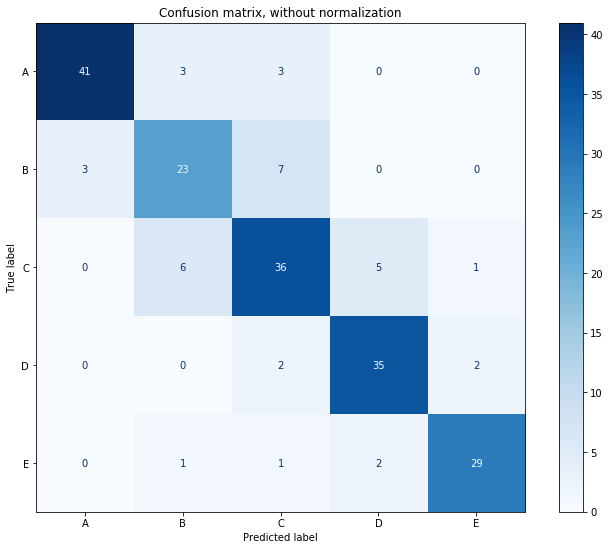

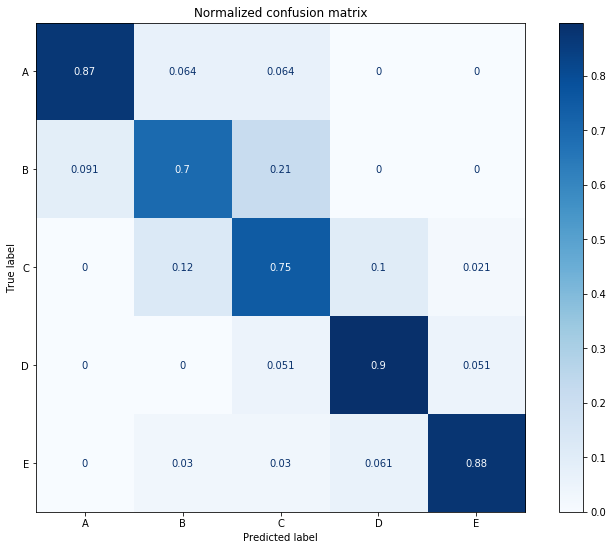

In [35]:
plt.rcParams["figure.figsize"] = [12,9]

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    # print(title)
    # print(disp.confusion_matrix)
    if normalize is None:
      plt.savefig('confusion_matrix_dt.jpg')
    else:
      plt.savefig('confusion_matrix_norm_dt.jpg')

# Random Forest

In [36]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
clf.score(X_test,y_test)

0.865

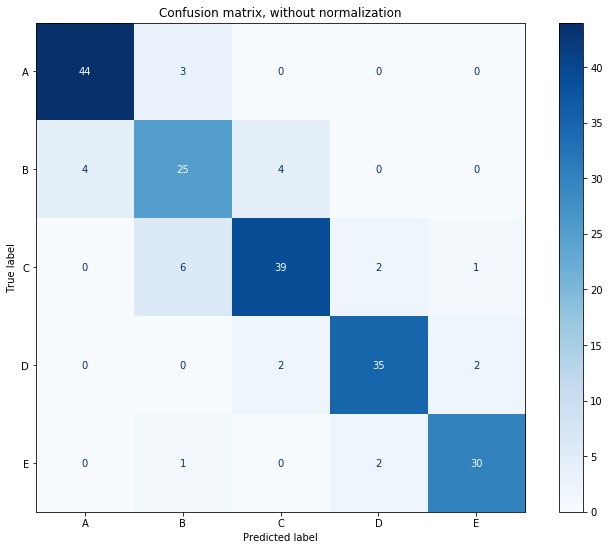

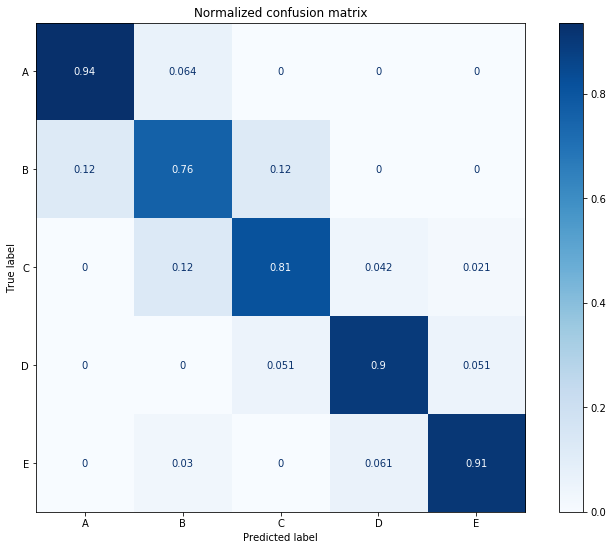

In [38]:
plt.rcParams["figure.figsize"] = [12,9]

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    # print(title)
    # print(disp.confusion_matrix)
    if normalize is None:
      plt.savefig('confusion_matrix_rf.jpg')
    else:
      plt.savefig('confusion_matrix_norm_rf.jpg')

# XGBoost

In [0]:
def runXGB(train_X, train_y, validation_X, validation_y, test_X):
    param = {}
    param['objective'] = 'multi:softmax'
    param['num_class'] = 5
    param['eta'] = 0.01
    param['max_depth'] = 6
    param['silent'] = 1
    param['gamma'] = 0
    param['eval_metric'] = "mlogloss"
    param['min_child_weight'] = 1
    param['max_delta_step'] = 0
    param['subsample'] = 1
    param['colsample_bytree'] = 1
    param['lambda'] = 1
    param['alpha'] = 0
    param['seed'] = 0
    num_rounds = 10000

    plst = list(param.items())

    xgtrain = xgb.DMatrix(train_X, label = train_y)
    xgcv = xgb.DMatrix(validation_X, label = validation_y)
    xgtest = xgb.DMatrix(test_X)

    evallist = [(xgcv,'eval')]
    model = xgb.train(plst, xgtrain, num_rounds, evallist, early_stopping_rounds = 100)

    pred_test_y = model.predict(xgtest)
    return pred_test_y, model

In [40]:
preds, model = runXGB(X_train, y_train, X_val, y_val, X_test)

[0]	eval-mlogloss:1.59677
Will train until eval-mlogloss hasn't improved in 100 rounds.
[1]	eval-mlogloss:1.5845
[2]	eval-mlogloss:1.5724
[3]	eval-mlogloss:1.56063
[4]	eval-mlogloss:1.54904
[5]	eval-mlogloss:1.53769
[6]	eval-mlogloss:1.52612
[7]	eval-mlogloss:1.51526
[8]	eval-mlogloss:1.50412
[9]	eval-mlogloss:1.49339
[10]	eval-mlogloss:1.48276
[11]	eval-mlogloss:1.47214
[12]	eval-mlogloss:1.46209
[13]	eval-mlogloss:1.45196
[14]	eval-mlogloss:1.4421
[15]	eval-mlogloss:1.43213
[16]	eval-mlogloss:1.42269
[17]	eval-mlogloss:1.41321
[18]	eval-mlogloss:1.40357
[19]	eval-mlogloss:1.39449
[20]	eval-mlogloss:1.38546
[21]	eval-mlogloss:1.37626
[22]	eval-mlogloss:1.3674
[23]	eval-mlogloss:1.35856
[24]	eval-mlogloss:1.34974
[25]	eval-mlogloss:1.34121
[26]	eval-mlogloss:1.33279
[27]	eval-mlogloss:1.32428
[28]	eval-mlogloss:1.31627
[29]	eval-mlogloss:1.30836
[30]	eval-mlogloss:1.3004
[31]	eval-mlogloss:1.29242
[32]	eval-mlogloss:1.28476
[33]	eval-mlogloss:1.2771
[34]	eval-mlogloss:1.26947
[35]	eval

In [41]:
(y_test['nutrition_grade_fr'] == preds).mean()

0.87

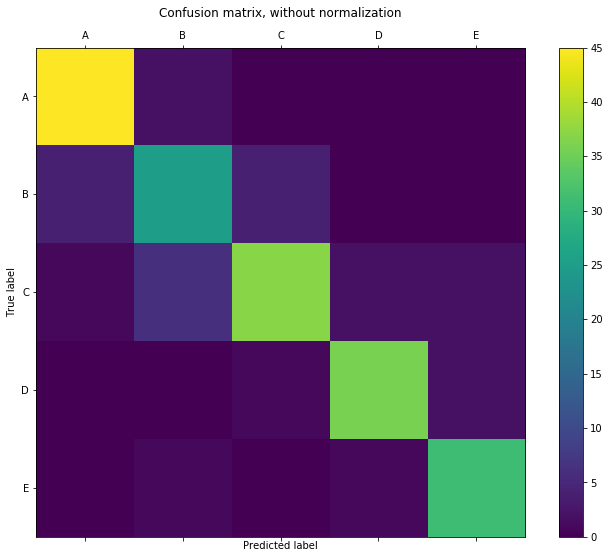

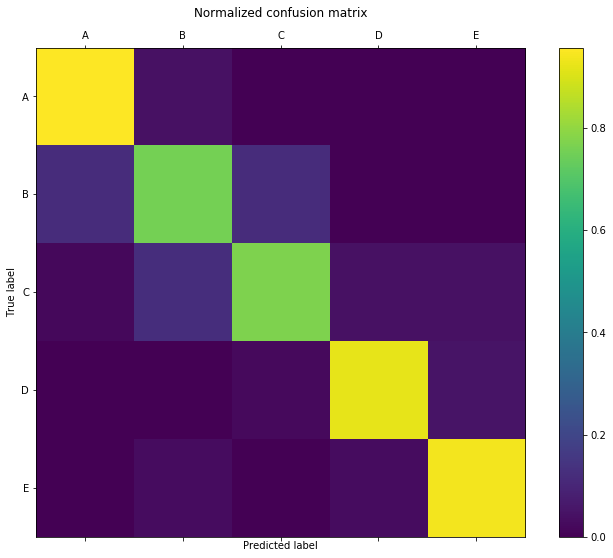

In [42]:
plt.rcParams["figure.figsize"] = [12,9]

cm = confusion_matrix(y_test['nutrition_grade_fr'], preds, labels=[0,1,2,3,4])

labels = ['A','B','C','D','E']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix, without normalization')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_xgb.jpg')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm)
plt.title('Normalized confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_norm_xgb.jpg')